# Prediciting Acoustic log value using Ensemble learning

In [2]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import missingno as mno
import warnings 
warnings.filterwarnings('ignore')
print('done')

done


# Training data

training data of multiple wells of Taranaki basin, NZ is used and the variable which stores this dataset is named as "mixed" 

In [3]:
mixed = pd.read_excel("mixed data\mixed_training data.xlsx")

# Test data

In [4]:
# test data
df_test = pd.read_csv("test well kea1\Test_kea1.csv")  #Kea 1

Text(0.5, 1.0, "Pearson's-Correlation Heatmap")

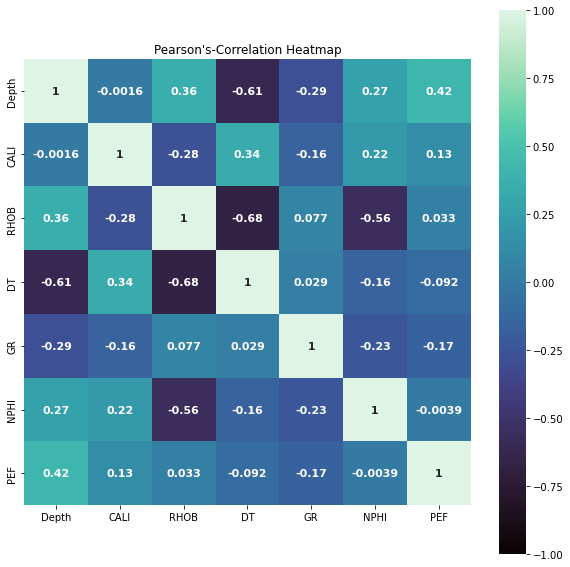

In [5]:
# correlation heatmap 1
corr = mixed.corr(method = 'pearson')
plt.figure(figsize = (10,10)) #RdBu
h_map = sns.heatmap(corr, cmap = 'mako', vmin = -1, vmax = 1, annot = True, square = True,
            annot_kws = {'fontsize': 11, 'fontweight':'bold'})
plt.title("Pearson's-Correlation Heatmap")

Text(0.5, 1.0, "Spearman's-Correlation Heatmap")

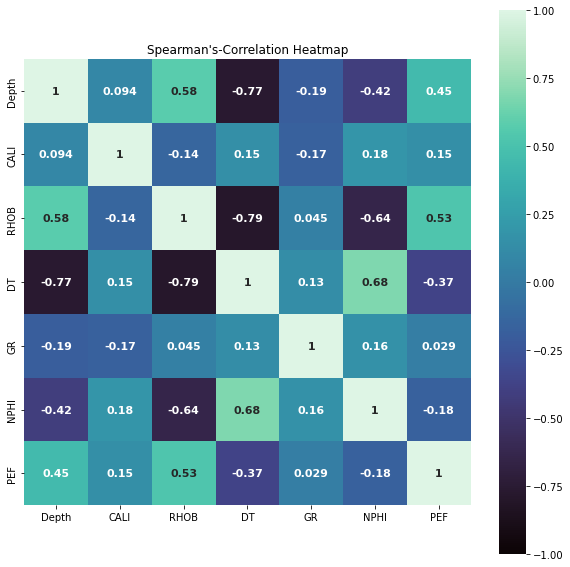

In [6]:
# correlation heatmap 2
corr = mixed.corr(method = 'spearman')
plt.figure(figsize = (10,10)) #RdBu
h_map = sns.heatmap(corr, cmap = 'mako', vmin = -1, vmax = 1, annot = True, square = True,
            annot_kws = {'fontsize': 11, 'fontweight':'bold'})
plt.title("Spearman's-Correlation Heatmap")

In [7]:
mixed

,Depth,CALI,RHOB,DT,GR,NPHI,PEF
0,27.5844,NaN,NaN,NaN,NaN,NaN,NaN
1,27.7368,NaN,NaN,NaN,NaN,NaN,NaN
2,27.8892,NaN,NaN,NaN,NaN,NaN,NaN
3,28.0416,NaN,NaN,NaN,NaN,NaN,NaN
4,28.1940,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1048570,1824.5328,6.7315,2.4640,87.1214,102.7669,0.26281,3.0645
1048571,1824.6852,6.7315,2.4686,87.8276,103.0801,0.26397,3.0723
1048572,1824.8376,6.7314,2.4731,88.5338,103.3933,0.26513,3.0801
1048573,1824.9900,6.7313,2.4777,89.2400,103.7065,0.26628,3.0878


In [8]:
mixed.describe()

,Depth,CALI,RHOB,DT,GR,NPHI,PEF
count,1.048575e+06,715381.000000,631627.000000,712926.000000,843206.000000,616459.000000,521434.000000
mean,1.711761e+03,10.669835,2.399742,94.466984,88.415312,18.266283,3.269418
std,1.095464e+03,3.427811,0.172201,21.652372,26.590216,140.082539,0.764817
min,0.000000e+00,1.505500,0.799980,-119.236600,3.388000,0.000400,0.698600
25%,8.641080e+02,8.537800,2.317500,80.341925,70.178325,0.237040,2.938000
50%,1.531772e+03,9.232000,2.412800,92.154250,91.778550,0.293480,3.168100
75%,2.382317e+03,12.436700,2.511800,104.582375,108.080600,0.336990,3.440500
max,5.059375e+03,29.967800,4.568200,419.179600,287.128400,1754.845000,19.395500


In [9]:
mixed.head()

,Depth,CALI,RHOB,DT,GR,NPHI,PEF
0,27.5844,NaN,NaN,NaN,NaN,NaN,NaN
1,27.7368,NaN,NaN,NaN,NaN,NaN,NaN
2,27.8892,NaN,NaN,NaN,NaN,NaN,NaN
3,28.0416,NaN,NaN,NaN,NaN,NaN,NaN
4,28.1940,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

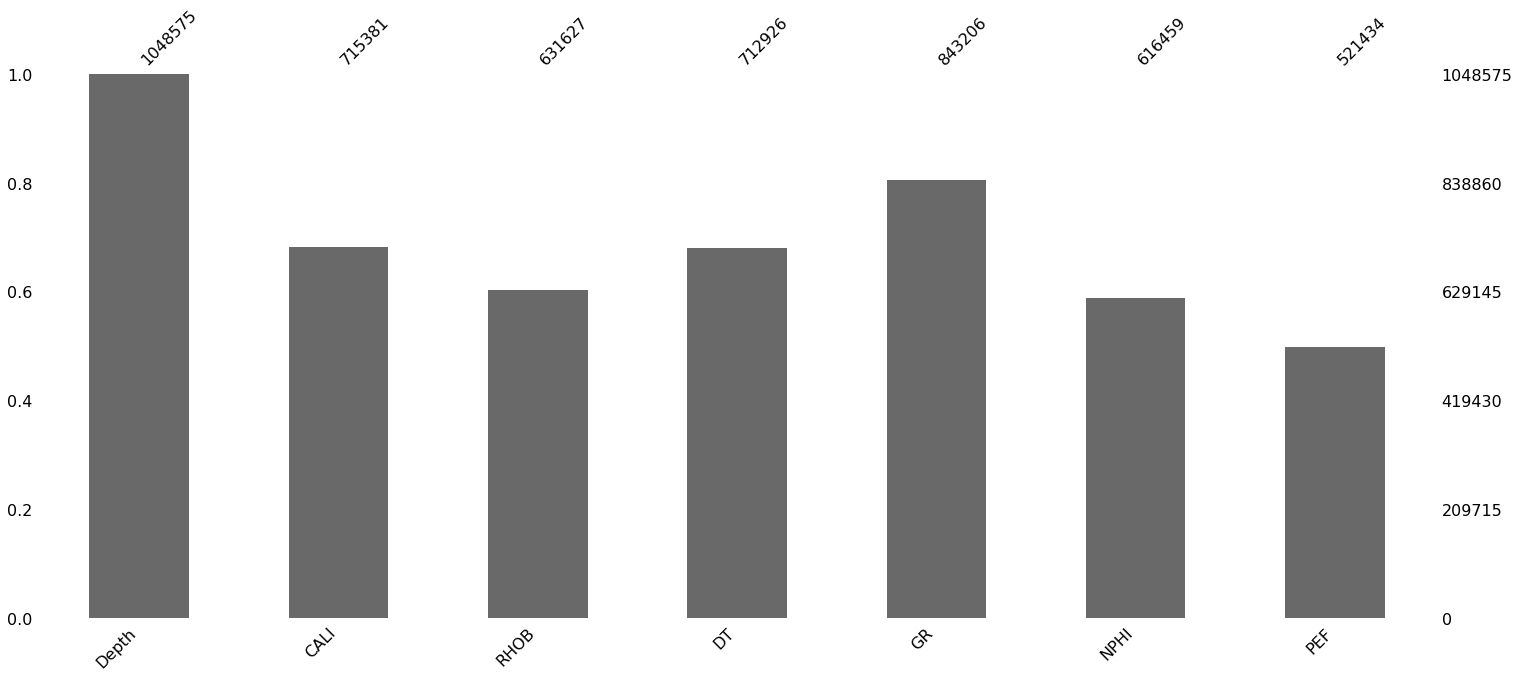

In [10]:
mno.bar(mixed)

In [11]:
mixed2 = mixed[['Depth', 'RHOB', 'NPHI', 'CALI', 'GR','DT']]

<AxesSubplot:>

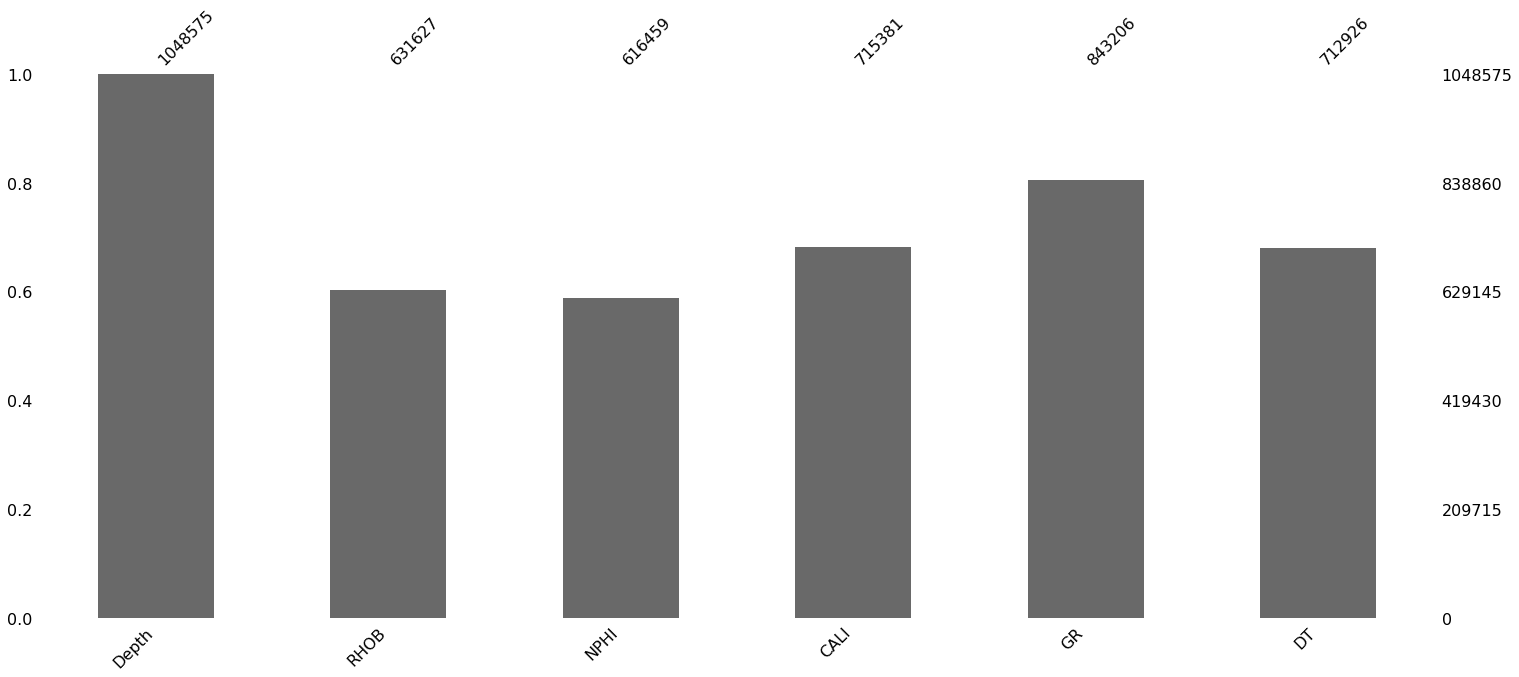

In [12]:
mno.bar(mixed2)

In [14]:
mixed2.dropna(inplace = True)

In [15]:
mixed2

,Depth,RHOB,NPHI,CALI,GR,DT
4147,659.5872,2.2471,0.34758,13.6155,92.1177,118.2797
4148,659.7396,2.2503,0.32441,13.8558,92.9298,118.0861
4149,659.8920,2.2536,0.30124,14.0961,93.7420,117.8926
4150,660.0444,2.2543,0.29313,14.1598,94.4243,117.8988
4151,660.1968,2.2487,0.32163,13.7939,94.7903,118.3909
...,...,...,...,...,...,...
1048570,1824.5328,2.4640,0.26281,6.7315,102.7669,87.1214
1048571,1824.6852,2.4686,0.26397,6.7315,103.0801,87.8276
1048572,1824.8376,2.4731,0.26513,6.7314,103.3933,88.5338
1048573,1824.9900,2.4777,0.26628,6.7313,103.7065,89.2400


In [16]:
mixed2.head()

,Depth,RHOB,NPHI,CALI,GR,DT
4147,659.5872,2.2471,0.34758,13.6155,92.1177,118.2797
4148,659.7396,2.2503,0.32441,13.8558,92.9298,118.0861
4149,659.8920,2.2536,0.30124,14.0961,93.7420,117.8926
4150,660.0444,2.2543,0.29313,14.1598,94.4243,117.8988
4151,660.1968,2.2487,0.32163,13.7939,94.7903,118.3909


In [17]:
mixed2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539961 entries, 4147 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depth   539961 non-null  float64
 1   RHOB    539961 non-null  float64
 2   NPHI    539961 non-null  float64
 3   CALI    539961 non-null  float64
 4   GR      539961 non-null  float64
 5   DT      539961 non-null  float64
dtypes: float64(6)
memory usage: 28.8 MB


# Preparing the Random Forest model

In [18]:
# Evaluation parameters
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Model 1
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

# Model 2
import xgboost as xg

## Selecting training and test features

In [19]:
X = mixed2[['Depth', 'RHOB', 'NPHI', 'CALI', 'GR']]  
y = mixed2['DT']
print(len(X), len(y))

539961 539961


In [20]:
X

,Depth,RHOB,NPHI,CALI,GR
4147,659.5872,2.2471,0.34758,13.6155,92.1177
4148,659.7396,2.2503,0.32441,13.8558,92.9298
4149,659.8920,2.2536,0.30124,14.0961,93.7420
4150,660.0444,2.2543,0.29313,14.1598,94.4243
4151,660.1968,2.2487,0.32163,13.7939,94.7903
...,...,...,...,...,...
1048570,1824.5328,2.4640,0.26281,6.7315,102.7669
1048571,1824.6852,2.4686,0.26397,6.7315,103.0801
1048572,1824.8376,2.4731,0.26513,6.7314,103.3933
1048573,1824.9900,2.4777,0.26628,6.7313,103.7065


# Distribution of training features

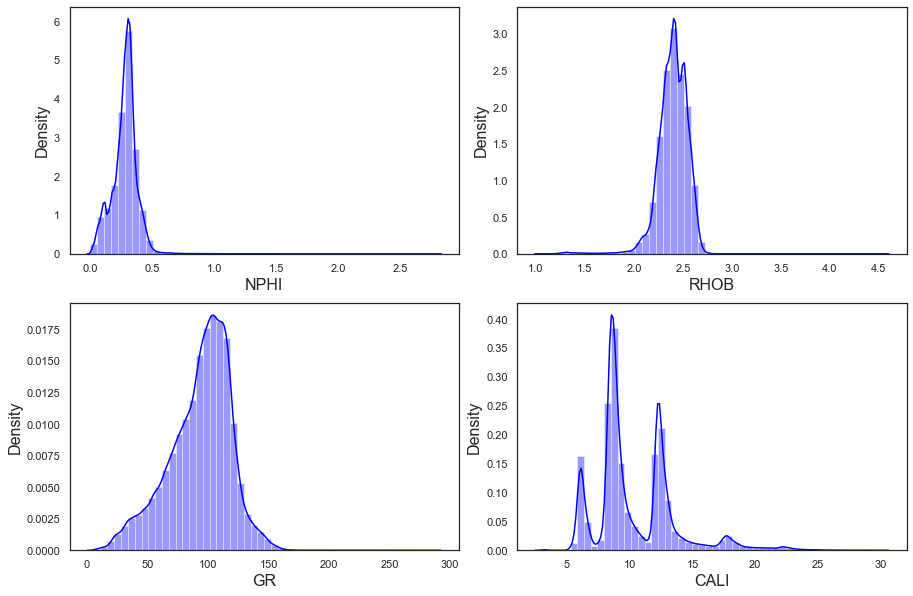

In [22]:
fig = plt.figure(figsize = (15,10))
#figsize = (18,12)
sns.set(font_scale=1)
sns.set_style(style= 'white')

fig.add_subplot(2,2,1)
ax1 = sns.distplot(X['NPHI'], color = 'blue')

fig.add_subplot(2,2,2)
ax2 = sns.distplot(X['RHOB'], color = 'blue')

fig.add_subplot(2,2,3)
ax3 = sns.distplot(X['GR'], color = 'blue')

fig.add_subplot(2,2,4)
ax4 = sns.distplot(X['CALI'], color = 'blue')

ax1.set_xlabel("NPHI",fontsize = 16)
ax1.set_ylabel("Density",fontsize = 16)

ax2.set_xlabel("RHOB",fontsize = 16)
ax2.set_ylabel("Density",fontsize = 16)

ax3.set_xlabel("GR",fontsize = 16)
ax3.set_ylabel("Density",fontsize = 16)

ax4.set_xlabel("CALI",fontsize = 16)
ax4.set_ylabel("Density",fontsize = 16)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.20)


# Train Test Split

In [23]:
# splitting training and testing data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# Preparing the Random Forest model

In [25]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
y_pred = model1.predict(X_val)

# Residual plots for random forest regressor

In [77]:
# Calculate residuals
predicted = y_pred
residuals = y_val - y_pred

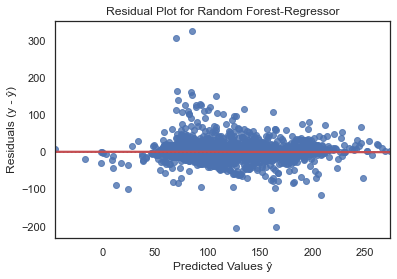

In [78]:
# residual plots for random forest regressor

sns.residplot(predicted, residuals, lowess=True, color='b', line_kws=dict(color="r"))
plt.xlabel('Predicted Values ŷ')
plt.ylabel('Residuals (y - ŷ)')
plt.title('Residual Plot for Random Forest-Regressor')
plt.show()

# Preparing the XGBoost model

In [27]:
model2 = xg.XGBRegressor(objective ='reg:linear')

In [28]:
# Fitting the model

model2.fit(X_train, y_train)

[16:51:36] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [29]:
# Predict from model2
y_pred2 = model2.predict(X_val)

# Residual plots for XGBoost regressor

In [75]:
# Calculate residuals
predicted2 = y_pred2
residuals2 = y_val - y_pred2

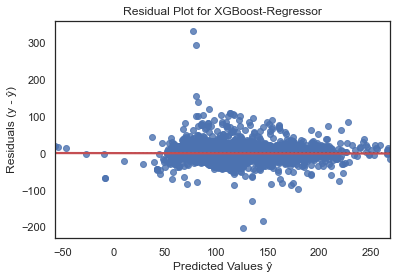

In [76]:
# residual plots for XGBoost regressor

sns.residplot(predicted2, residuals2, lowess=True, color='b', line_kws=dict(color="r"))
plt.xlabel('Predicted Values ŷ')
plt.ylabel('Residuals (y - ŷ)')
plt.title('Residual Plot for XGBoost-Regressor')
plt.show()

# Relative importance plots of training features used in model development

## Relative importance plot for Random Forest Regressor

In [84]:
features = X.columns

In [85]:
features

Index(['Depth', 'RHOB', 'NPHI', 'CALI', 'GR'], dtype='object')

In [86]:
rf_imp_features = model1.feature_importances_

In [87]:
rf_imp_features

array([0.26697543, 0.51147282, 0.11328451, 0.0722246 , 0.03604264])

Text(0.5, 1.0, 'Feature Importance - Random Forest regressor')

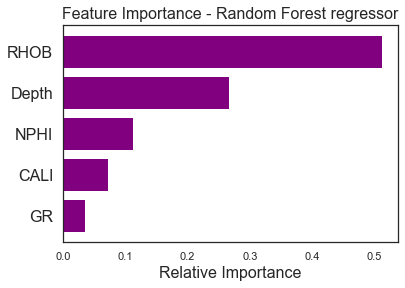

In [88]:
indices = np.argsort(rf_imp_features)[-5:]
plt.barh(range(len(indices)),rf_imp_features[indices], color = 'purple')
plt.yticks(range(len(indices)),[features[i] for i in indices], fontsize = 16)
plt.xlabel('Relative Importance', fontsize = 16)
plt.title('Feature Importance - Random Forest regressor', fontsize = 16)

## Relative importance plot for XGBoost Regressor

In [89]:
# XGB  freature importances

In [90]:
xgb_imp_features = model2.feature_importances_

Text(0.5, 1.0, 'Feature Importance - XGBoost Regressor')

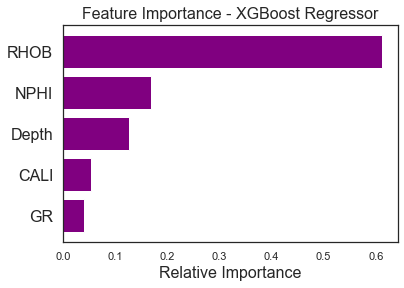

In [91]:
indices2 = np.argsort(xgb_imp_features)[-5:]
plt.barh(range(len(indices2)),xgb_imp_features[indices2], color = 'purple')
plt.yticks(range(len(indices2)),[features[i] for i in indices2], fontsize = 16)
plt.xlabel('Relative Importance', fontsize = 16)
plt.title('Feature Importance - XGBoost Regressor', fontsize = 16)

# Model Evaluation

The following parameters are used for model evaluation
1. Mean absolute error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)
4. R2 Score (Coefficient of determination)


### 1. Mean absolute error (MAE)
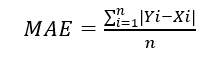

In [92]:
mae_rf = metrics.mean_absolute_error(y_val, y_pred)  #random forest regression
print("MAE_rf: ", mae_rf )
mae_xgb = metrics.mean_absolute_error(y_val, y_pred2)  # XGboost
print("MAE_xgb: ", mae_xgb )

MAE_rf:  1.713144157825044
MAE_xgb:  3.259831259121052


### 2. Mean Squared Error (MSE)
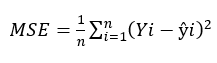

In [47]:
mse_rf = metrics.mean_squared_error(y_val, y_pred)  #random forest regression
print('MSE_rf: ', mse_rf)
mse_xgb = metrics.mean_squared_error(y_val, y_pred2) # XGboost
print('MSE_xgb: ', mse_xgb)

MSE_rf:  20.733183393018045
MSE_xgb:  32.09804712259729


### 3. Root Mean Squared Error (RMSE)
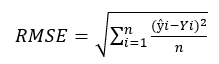

In [49]:
RMSE_rf = mse_rf ** 0.5 #random forest regression
print('RMSE_rf: ', RMSE_rf)
RMSE_xgb = mse_xgb ** 0.5 # XGboost
print('RMSE_xgb: ', RMSE_xgb)

RMSE_rf:  4.55337055300994
RMSE_xgb:  5.665513844533194


### 4. R2 Score (Coefficient of determination)
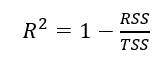

In [44]:
r2_forest = metrics.r2_score(y_val,y_pred)  # random forest regression
print("R2-Score Random Forest: ",r2_forest)
r2_xgb = metrics.r2_score(y_val,y_pred2) # XGboost
print("R2-Score XGBoost: ", r2_xgb)

R2-Score Random Forest:  0.943688316925022
R2-Score XGBoost:  0.9128211513576787


# Test 

In [52]:
df_test

,Depth,CALI,GR,DT,NPHI,RHOB,PEF
0,120.549,NaN,8.4766,NaN,NaN,NaN,NaN
1,120.701,NaN,10.4453,NaN,NaN,NaN,NaN
2,120.853,NaN,13.9844,NaN,NaN,NaN,NaN
3,121.006,NaN,16.7656,NaN,NaN,NaN,NaN
4,121.158,NaN,16.3906,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19781,3135.173,NaN,NaN,NaN,NaN,NaN,NaN
19782,3135.325,NaN,NaN,NaN,NaN,NaN,NaN
19783,3135.478,NaN,NaN,NaN,NaN,NaN,NaN
19784,3135.630,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_test_temp = df_test[['Depth','RHOB','NPHI','GR','CALI','DT']]
df_test_temp.dropna(inplace=True)

# dt_test_temp is a temporary variable to store dataset with ['Depth','RHOB','NPHI','GR','CALI'] feature and no NaN values

<AxesSubplot:>

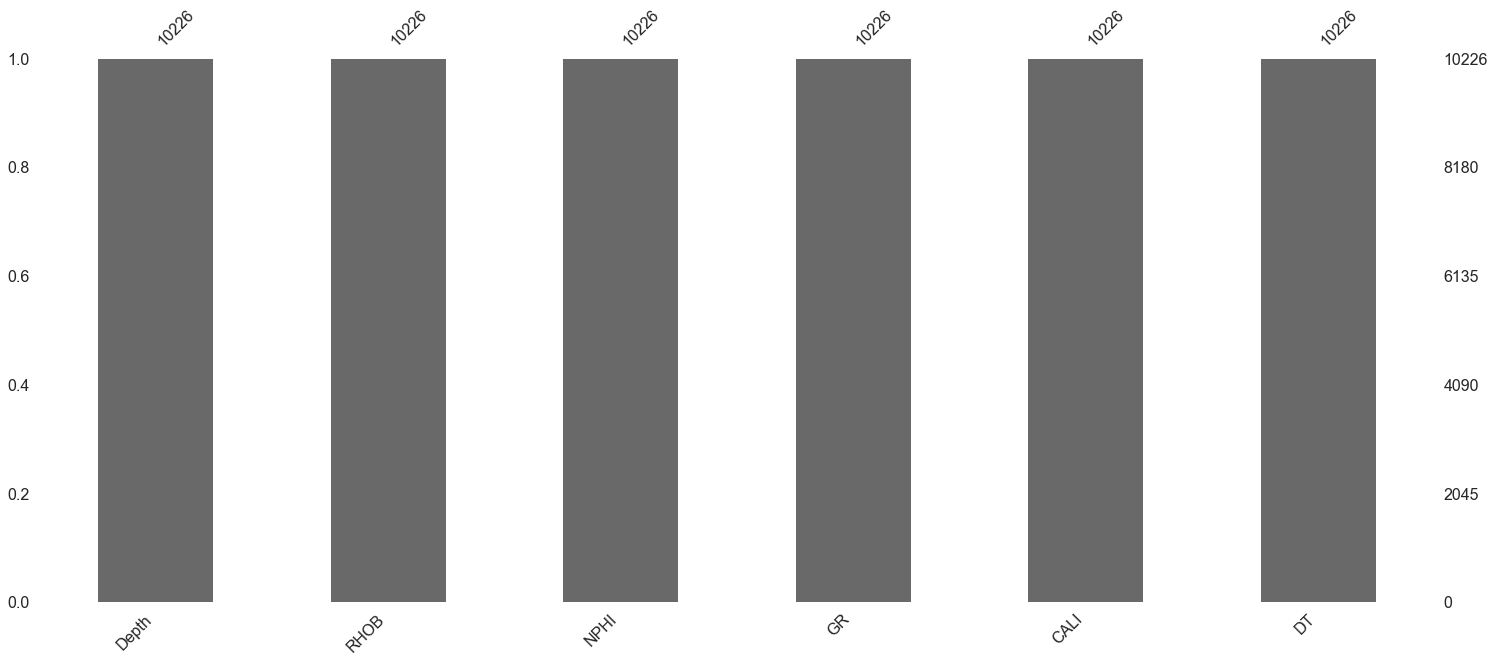

In [56]:
mno.bar(df_test_temp)

In [60]:
X_test = df_test_temp[['Depth', 'RHOB', 'NPHI', 'CALI', 'GR']]
y_test_org = df_test_temp['DT'] # original values of dataset

In [61]:
y_test_pred = model1.predict(X_test)

In [62]:
y_test_pred2 = model2.predict(X_test)


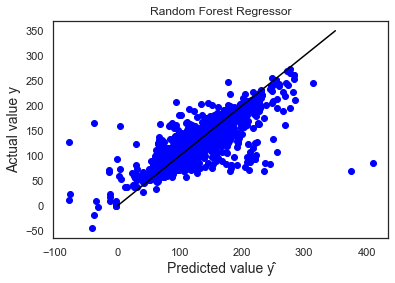

In [63]:
plt.scatter(y_val, y_pred,c = 'blue')
plt.plot((0,350),(0,350),'black')
plt.ylabel('Actual value y', fontsize=14)
plt.xlabel('Predicted value ŷ', fontsize=14)
plt.title('Random Forest Regressor')
plt.show()

In [64]:
# converting to numpy array
y_val_array = np.array(y_val)

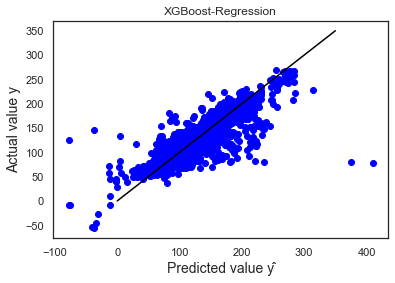

In [68]:
# plt.scatter(y_val, y_pred2)
# plt.plot((-100,350),(-100,350),'black')
# # plt.Xlim(40,140)
# # plt.ylim(40,140)

# for XG boost

plt.scatter(y_val, y_pred2,c='blue')
plt.plot((0,350),(0,350),'black')
plt.ylabel('Actual value y', fontsize=14)
plt.xlabel('Predicted value ŷ', fontsize=14)
plt.title('XGBoost-Regression')
plt.show()

# Test data scatter plot (Actual vs Predicted)

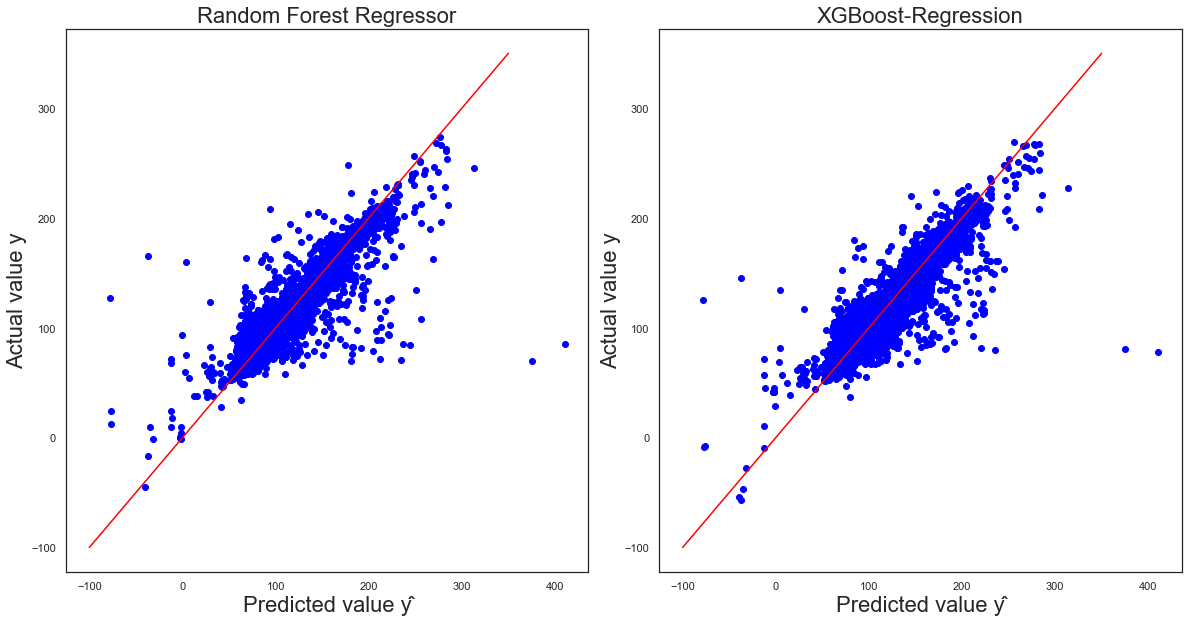

In [69]:
plt.figure(plt.figure(figsize = (20,10)))

#1
plt.subplot(1,2,1)
plt.scatter(y_val_array, y_pred,c = 'blue')
plt.plot((-100,350),(-100,350),'red')
plt.ylabel('Actual value y', fontsize=22)
plt.xlabel('Predicted value ŷ', fontsize=22)
plt.title('Random Forest Regressor', fontsize=22)
#plt.show()

#2
plt.subplot(1,2,2)
plt.scatter(y_val_array, y_pred2,c = 'blue')
plt.plot((-100,350),(-100,350),'red')
plt.ylabel('Actual value y', fontsize=22)
plt.xlabel('Predicted value ŷ', fontsize=22)
plt.title('XGBoost-Regression', fontsize=22)
#plt.show()



plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.135, hspace=0.1)


# KDE plots

(50.0, 150.0)

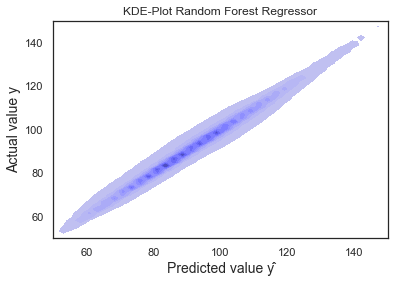

In [79]:
sns.kdeplot(y_val, y_pred, fill = True, shade = True, color = 'Blue')
plt.ylabel('Actual value y', fontsize=14)
plt.xlabel('Predicted value ŷ', fontsize=14)
plt.title('KDE-Plot Random Forest Regressor')
plt.xlim(50,150)
plt.ylim(50,150)

(50.0, 140.0)

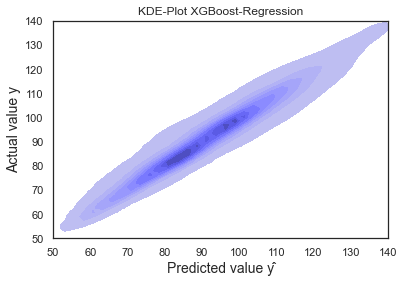

In [80]:
sns.kdeplot(y_val, y_pred2, fill = True, shade = True, color = 'Blue')
plt.ylabel('Actual value y', fontsize=14)
plt.xlabel('Predicted value ŷ', fontsize=14)
plt.title('KDE-Plot XGBoost-Regression')
plt.xlim(50,140)
plt.ylim(50,140)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# Results

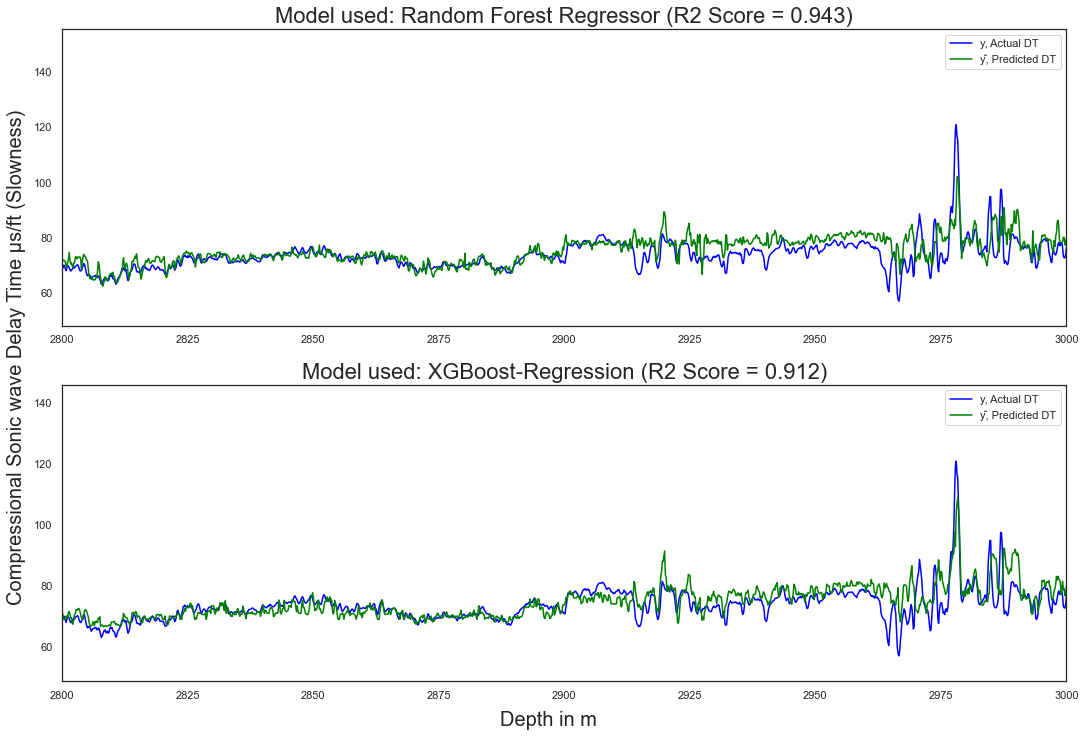

In [73]:
fig = plt.figure(figsize = (18,12))
#plt.figure(figsize = (15,5))

fig.add_subplot(2,1,1)
plt.plot(df_test_temp['Depth'],y_test_org, label = 'y, Actual DT', color = 'Blue')
plt.plot(df_test_temp['Depth'],y_test_pred,label ='ŷ, Predicted DT', color = 'Green')
#plt.xlabel('Depth in m')
#plt.ylabel('Compressional Sonic wave Delay Time µs/ft (Slowness)')
plt.xlim(2800,3000)
plt.title('Model used: Random Forest Regressor (R2 Score = 0.943)', fontsize = 22)
plt.legend()


fig.add_subplot(2,1,2)
plt.plot(df_test_temp['Depth'],y_test_org, label = 'y, Actual DT', color = 'Blue')
plt.plot(df_test_temp['Depth'],y_test_pred2,label ='ŷ, Predicted DT', color = 'Green')
#plt.xlabel('Depth in m')
#plt.ylabel('Compressional Sonic wave Delay Time µs/ft (Slowness)')
plt.xlim(2800,3000)
plt.title('Model used: XGBoost-Regression (R2 Score = 0.912)', fontsize = 22)
plt.legend()
# commonm label
fig.text(0.09, 0.5, 'Compressional Sonic wave Delay Time µs/ft (Slowness)', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0.08, 'Depth in m', ha='center', va='center', fontsize = 20)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
